In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [135]:
df = pd.read_csv('book.csv')
df

,S.no,W75,width75,ratio75,W100,width100,ratio100,W150,width150,ratio150,Actual (in cm)
0,1,552.008152,960,0.575008,458.004367,960,0.477088,311.006431,725,0.428974,47
1,2,637.007064,960,0.663549,429.004662,909,0.471952,314.006369,730,0.430146,43
2,3,554.008123,960,0.577092,433.004619,960,0.451046,283.007067,671,0.421769,42
3,4,608.020559,960,0.633355,494.004049,960,0.514588,323.006192,960,0.336465,48
4,5,719.002782,960,0.748961,532.015037,959,0.554760,354.005650,817,0.433299,48
5,6,692.002890,960,0.720836,463.017278,960,0.482310,350.005882,683,0.512454,49
6,7,551.014519,959,0.574572,651.027649,960,0.678154,331.024168,708,0.467548,49
7,8,618.007282,960,0.643758,451.004435,960,0.469796,286.015734,680,0.420611,43
8,9,448.004464,959,0.467158,562.003559,960,0.585420,288.006944,653,0.441052,42
9,10,605.007438,960,0.630216,450.010000,960,0.468760,296.006757,683,0.433392,44


In [162]:
# Collect the specific columns for X and y, convert into workable numpy arrays
X = df['ratio100'].to_numpy().reshape(-1, 1)
y = df['Actual (in cm)'].to_numpy().reshape(-1, 1)

KeyError: 'ratio100'

In [163]:
# Split X and y with 70/30 train/test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1234)

In [164]:
# Create LR model instance, fit training data, get coeficient
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
coef = reg.coef_[0][0]

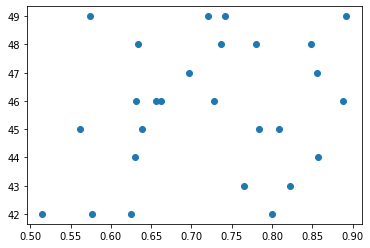

In [168]:
plt.plot(X_train, y_train, 'o')
plt.show()

In [169]:
y_pred = reg.predict(x_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,42,45.694497
1,53,45.716365
2,46,45.702970
3,43,45.699260
4,48,45.710816
5,46,45.708941
6,53,45.707520
7,46,45.701867
8,48,45.707547
9,47,45.702533


In [170]:
np.mean((y_test - y_pred)**2)

12.379300024971991